In [1]:
# importing libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
# reading image
img = cv.imread('jerry.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray =  cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

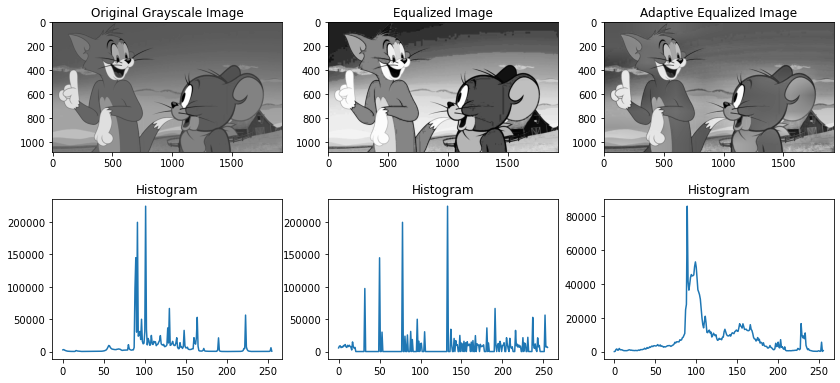

In [23]:
hist = cv.calcHist([img_gray],[0],None,[256],[0,256])
img_eq = cv.equalizeHist(img_gray)
hist_eq = cv.calcHist([img_eq],[0],None,[256],[0,256])

cl = cv.createCLAHE(3.0,(8,8))
img_ad_eq = cl.apply(img_gray)
hist_ad_eq = cv.calcHist([img_ad_eq],[0],None,[256],[0,256])

row,col = 3,3
fig = plt.figure(figsize=(14,10))
gs = GridSpec(row,col)

fig.add_subplot(gs[0,0])
plt.title('Original Grayscale Image')
plt.imshow(img_gray,cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('Equalized Image')
plt.imshow(img_eq,cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Adaptive Equalized Image')
plt.imshow(img_ad_eq,cmap='gray')

fig.add_subplot(gs[1,0])
plt.title('Histogram')
plt.plot(hist)

fig.add_subplot(gs[1,1])
plt.title('Histogram')
plt.plot(hist_eq)

fig.add_subplot(gs[1,2])
plt.title('Histogram')
plt.plot(hist_ad_eq)

plt.savefig('1.jpg')
plt.show()

In [7]:
# Gausian Noise
gaussian_noise = np.zeros((img_gray.shape[0],img_gray.shape[1]),dtype = np.uint8)
cv.randn(gaussian_noise,128,20)

gaussian_noise = (gaussian_noise*0.7).astype(np.uint8)
noise_img = cv.add(img_gray,gaussian_noise)

In [8]:
# Uniform Noise
uniform_noise = np.zeros((img_gray.shape[0],img_gray.shape[1]),dtype = np.uint8)
cv.randu(uniform_noise,0,255)
uniform_noise = (uniform_noise*0.7).astype(np.uint8)
uf_noise_img = cv.add(img_gray,uniform_noise)

In [13]:
# Binarized Uniform Noise
new_img = uniform_noise.copy()
ret,new_img = cv.threshold(uniform_noise,100,200,cv.THRESH_BINARY)
uf_bin_new = cv.add(img_gray,new_img)

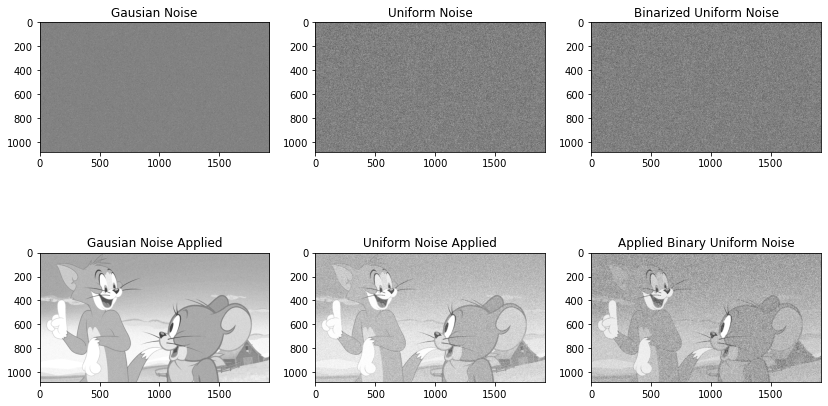

In [22]:
row, col = 3, 3
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(row, col)

fig.add_subplot(gs[0, 0])
plt.title("Gausian Noise")
plt.imshow(gaussian_noise, cmap='gray')

fig.add_subplot(gs[0, 1])
plt.title('Uniform Noise')
plt.imshow(uniform_noise, cmap='gray')

fig.add_subplot(gs[0, 2])
plt.title('Binarized Uniform Noise')
plt.imshow(uniform_noise, cmap='gray')


fig.add_subplot(gs[1, 0])
plt.title('Gausian Noise Applied')
plt.imshow(noise_img, cmap='gray')

fig.add_subplot(gs[1, 1])
plt.title('Uniform Noise Applied')
plt.imshow(uf_noise_img, cmap='gray')

fig.add_subplot(gs[1, 2])
plt.title('Applied Binary Uniform Noise')
plt.imshow(uf_bin_new, cmap='gray')

plt.savefig('2.jpg')
plt.show()

In [17]:
# Bluring (Gausian Blur & Median Blur)
g_blur = cv.GaussianBlur(noise_img,(5,5),0.5)
m_blur = cv.medianBlur(uf_noise_img,5)

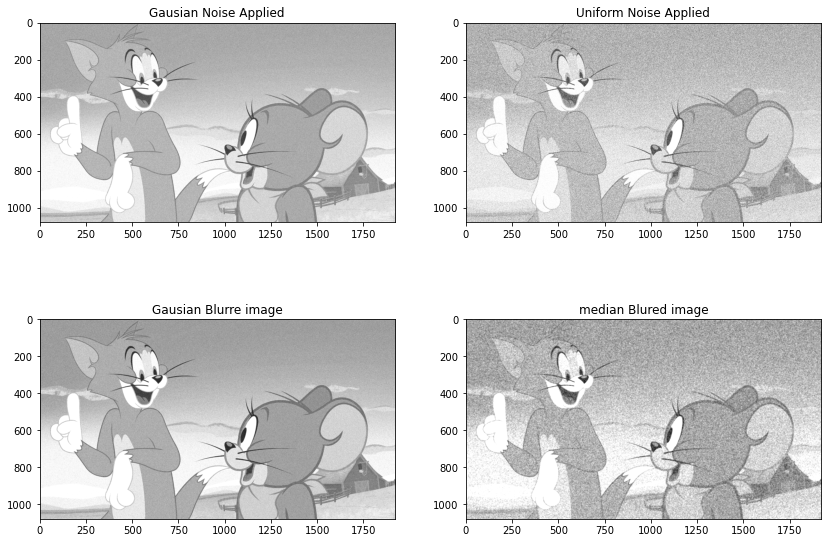

In [26]:
row, col = 2, 2
fig = plt.figure(figsize=(14,10))
gs = GridSpec(row, col)

fig.add_subplot(gs[0, 0])
plt.title('Gausian Noise Applied')
plt.imshow(noise_img, cmap='gray')

fig.add_subplot(gs[0, 1])
plt.title('Uniform Noise Applied')
plt.imshow(uf_noise_img, cmap='gray')

fig.add_subplot(gs[1, 0])
plt.title('Gausian Blurre image')
plt.imshow(g_blur, cmap='gray')

fig.add_subplot(gs[1, 1])
plt.title('median Blured image')
plt.imshow(m_blur, cmap='gray')

plt.savefig('3.jpg')
plt.show()